Python group project - ipynb n°2 - Visualization of data

# 1. Visualisation of win rates of each class of Hero, for levels : bronze gold and grandmaster 

The objective here is to find out graphically if the level influences the victory rate (which is a victory rate of the team) and if it is the same for all hero classes. We limit ourselves to Bronze (level 1), Gold (level 3) and GrandMaster (level 6).

Index(['DEFENSE', 'OFFENSE', 'SUPPORT', 'TANK'], dtype='object', name='Role')


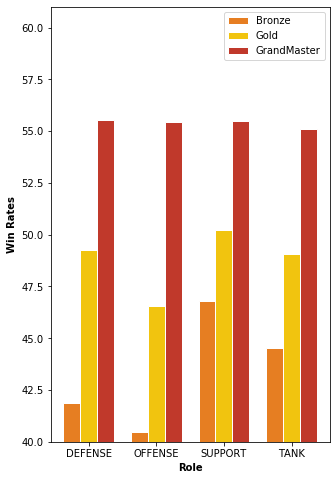

In [3]:
# 0. import libraries #

import pandas
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.patches as mpatches
plt.rcParams["figure.figsize"] = (5,8)

# 1. Read in a CSV file #

dataset = pandas.read_csv("overbuff.csv", encoding = "latin1")

# 2. keep only role, rank, and win_rate #

df0 = dataset[['Role','Rank', 'Win_rate']]

# 3. mean the win_rate for Role & Rank  #

df1 = df0.groupby(['Role', 'Rank']).mean()

# 4. Create index for Levels and Roles #

df2 = df1.index.get_level_values(1)
Index_Levels = df2[0:5]

df3 = df1.index.get_level_values(0)
Index_Role = df3[::8]
print(Index_Role)

# 5. Gather Win_Rates by Role for Bronze, Gold & GrandMaster levels #

Bronze_Win_Rates = df1[1::8]
Gold_Win_Rates = df1[3::8]
Grandmaster_Win_Rates = df1[4::8]

Bin = [1,2,3,4]

# 6. set width of bar #

barWidth = 0.25
 
# 7. set height of bar #

bars1 = Bronze_Win_Rates[Bronze_Win_Rates.columns[0]].tolist()
bars2 = Gold_Win_Rates[Gold_Win_Rates.columns[0]].tolist()
bars3 = Grandmaster_Win_Rates[Grandmaster_Win_Rates.columns[0]].tolist()
 
# 8. Set position of bar on X axis #

r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# 9. Make the plot #

plt.bar(r1, bars1, color='#e67e22', width=barWidth, edgecolor='white', label='Bronze')
plt.bar(r2, bars2, color='#f1c40f', width=barWidth, edgecolor='white', label='Gold')
plt.bar(r3, bars3, color='#c0392b', width=barWidth, edgecolor='white', label='GrandMaster')
plt.ylim(40,61)

# 10. Add xticks on the middle of the group bars #

plt.xlabel('Role', fontweight='bold')
plt.ylabel('Win Rates', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], Index_Role)
 
# 11. Create legend & Show graphic #

plt.legend()
plt.show()

## To conclude the n°1

We can see quite easily on the graph that the victory rates of bronze level players are unequal depending on the class chosen. On the other hand, this gap tends to narrow as the level increases until it becomes almost identical for all hero classes at the GrandMaster level. This analysis can allow us to advise beginner players to focus on the "support" class in order to significantly increase their chances of winning a game.

# 2. Scatter plots of the pick rate of each hero & the win rate 

The idea here is to represent in a graph both the pick rate (if a players are picking the Hero "x" 1 time on 100 the pick rate is 1%) for each hero and his victory rate. The whole is divided into classes (bubble colors). This graph is made for the Bronze level as well as for the GrandMaster level. We are looking here to visualize graphically whether players choose their heroes according to the victory rate they offer or whether it is the types of classes that influence players' choices.

In [4]:
# 1. Import lib & dataset - see point n°1 #
# 2. Select Only Bronze #

is_Bronze =  dataset['Rank']=='Bronze'
df_Bronze = dataset[is_Bronze]

# 3. select Only PSN #

is_PSN =  df_Bronze['Platform']=='PSN'
df_Bronze_PSN = df_Bronze[is_PSN]

# 4. Calculate Mean of rates for Bronze on PSN #

df_Bronze_PSN.mean(axis = 0) 

# 5. Keep only columns : Hero, Pick_Rate, Win_Rate, Role #

df_Bronze_PSN_Clean = df_Bronze_PSN.drop(["Tie_Rate", "On_fire", "Platform", "Rank", "Date"], axis=1)

# 6. Convert df to values then lists #

PR = df_Bronze_PSN_Clean_Pick_rate = df_Bronze_PSN_Clean[['Pick_rate']].values.tolist() #x

WR = df_Bronze_PSN_Clean_Win_Rate = df_Bronze_PSN_Clean[['Win_rate']].values.tolist()#y
WR2 = WR

ROLE = df_Bronze_PSN_Clean_Win_Rate = df_Bronze_PSN_Clean[['Role']].values.tolist() #z
Color_role = df_Bronze_PSN_Clean_Win_Rate = df_Bronze_PSN_Clean[['Role']]



I want the win rate to be visually constatable also with the buble size. To do that i need to enchance the difference of the minimum win rate and the maximum one. But i need to keep it proportional 

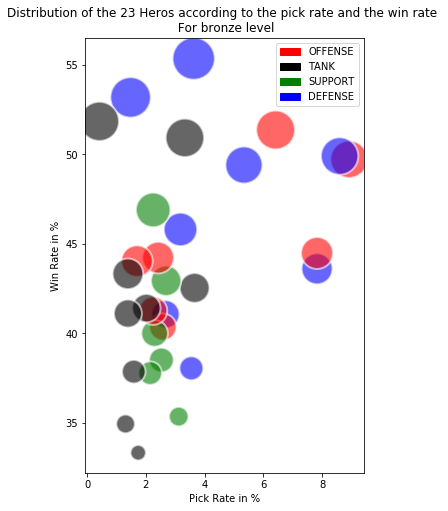

In [5]:
# 7. Create value for bubbles size #

WR3 = df_Bronze_PSN_Clean_Win_Rate = df_Bronze_PSN_Clean[['Win_rate']].values
WR4 = WR3-30
WR5 = WR4*70
WRZ = WR5.tolist()

# 8. Plot the Data #

x = PR
y = WR
z = [WRZ]

colors = {'TANK':'red', 'SUPPORT':'blue', 'DEFENSE':'green', 'OFFENSE':'black'} # Change color with c and alpha. I map the color to the X axis value
plt.scatter(x, y,s=z, c=Color_role['Role'].apply(lambda x: colors[x]), edgecolors="white",alpha=0.6, linewidth=2)
 
plt.xlabel("Pick Rate in %") # Add titles (main and on axis)
plt.ylabel("Win Rate in %")
plt.title("Distribution of the 23 Heros according to the pick rate and the win rate \n For bronze level")

black_patch = mpatches.Patch(color='black' , label='TANK')
green_patch = mpatches.Patch(color='green', label='SUPPORT')
blue_patch = mpatches.Patch(color='blue' , label='DEFENSE')
red_patch = mpatches.Patch(color='red' , label='OFFENSE')

plt.legend(handles=[red_patch,black_patch,green_patch, blue_patch])
plt.show()

Let's do the same plot for the level of GrandMaster

In [6]:
# 8. Select the needed data #

is_Grandmaster =  dataset['Rank']=='Grandmaster' #We focus only on the rank Grand Master
df_Grandmaster = dataset[is_Grandmaster]
df_Grandmaster

is_PSNGM =  df_Grandmaster['Platform']=='PSN' #We focus only on the platform PSN
df_Grandmaster_PSN = df_Grandmaster[is_PSNGM]
df_Grandmaster_PSN

# 9. Calculate Mean of rates for Bronze on PSN #

df_Grandmaster_PSN.mean(axis = 0) 
df_Grandmaster_PSN_Clean = df_Grandmaster_PSN.drop(["Tie_Rate", "On_fire", "Platform", "Rank", "Date"], axis=1)#Keep only columns : Hero, Pick_Rate, Win_Rate, Role

# 10. Convert df to values then lists #

PRGM = df_Grandmaster_PSN_Clean_Pick_rate = df_Grandmaster_PSN_Clean[['Pick_rate']].values.tolist() #x
WRGM = df_Grandmaster_PSN_Clean_Win_Rate = df_Grandmaster_PSN_Clean[['Win_rate']].values.tolist() #y
WR2GM = WR
ROLEGM = df_Grandmaster_PSN_Clean_Win_Rate = df_Grandmaster_PSN_Clean[['Role']].values.tolist() #z
ROLE = {'TANK', 'SUPPORT', 'DEFENSE', 'OFFENSE'}

Color_roleGM = df_Grandmaster_PSN_Clean_Win_Rate = df_Grandmaster_PSN_Clean[['Role']]

I want the win rate to be visually constatable also with the buble size. To do that i need to enchance the difference of the minimum win rate and the maximum one. But i need to keep it proportional.

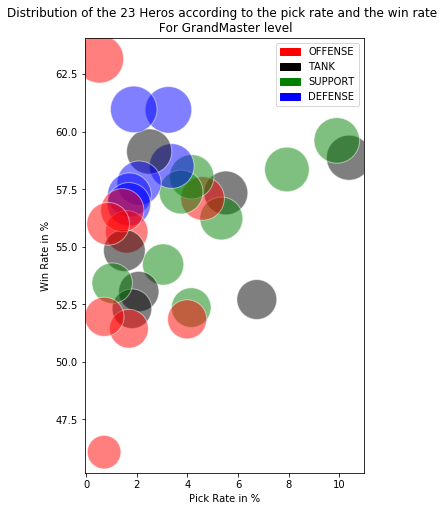

In [17]:
# 11. Create value for bubbles sizeand Define the variables#

WR3GM = df_Grandmaster_PSN_Clean_Win_Rate = df_Grandmaster_PSN_Clean[['Win_rate']].values
WR4GM = WR3GM-30
WR5GM = WR4GM*70
WRZGM = WR5GM.tolist()

xgm = PRGM
ygm = WRGM
zgm = [WRZGM]
 
# 12. Plot the data #

colors = {'TANK':'black', 'SUPPORT':'green', 'DEFENSE':'blue', 'OFFENSE':'red'} #Change color with c and alpha. I map the color to the X axis value.
plt.scatter(xgm, ygm,s=zgm, c=Color_role['Role'].apply(lambda x: colors[x]), edgecolors="white", alpha=0.5, linewidth=1)

plt.xlabel("Pick Rate in %") #Add titles on axis
plt.ylabel("Win Rate in %")
plt.title("Distribution of the 23 Heros according to the pick rate and the win rate \n For GrandMaster level") #Add the general title

black_patch = mpatches.Patch(color='black' , label='TANK')
green_patch = mpatches.Patch(color='green', label='SUPPORT')
blue_patch = mpatches.Patch(color='blue' , label='DEFENSE')
red_patch = mpatches.Patch(color='red' , label='OFFENSE')
plt.legend(handles=[red_patch,black_patch,green_patch, blue_patch])

plt.show()

## To conclude the n°2

We can see at first sight that heros pick rate and win rate is much more dispersed than for the grandmaster level. On the other hand, it is not obvious here that the characters' choices are influenced by the victory rate. It is also not easy to show the heroes' choices according to class, neither for the bronze level nor for the grandmaster level. 

# Evolution of the "on fire rate" level after level

In our dataset, being on fire is a state triggered in the game after a number of remarkable actions (e. g. a sequence of several kills). The rate of "on_fire" corresponds to the number of times players have been able to trigger this state in relation to the number of games.

Here we study the evolution of the triggering of this state "in fire" over the evolution of levels for each character in the "tank" and "support" class. We therefore try to see graphically if the evolutions are rhythmic in the same way for each character and for each class studied.

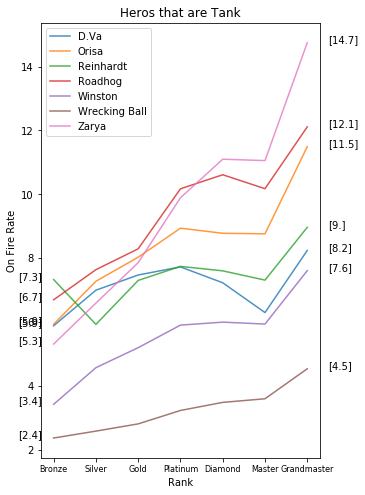

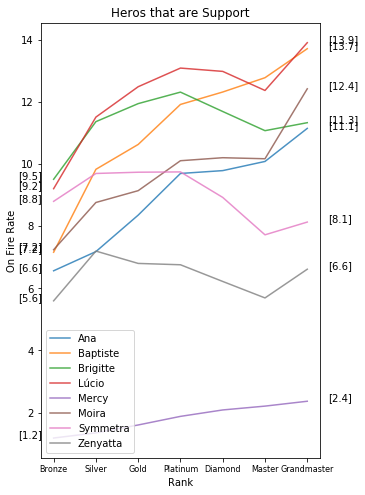

In [9]:
# 1. Import lib & dataset - see point n°1 #
# 2. Create list of unique values for Role & Platform #
Role_list = list(set(dataset["Role"]))
Order_rank = ["Bronze","Silver" , "Gold", "Platinum","Diamond","Master","Grandmaster" ]

# 3. Select Only Tie rate and level #
 
df1 = dataset.drop(["Tie_Rate","Pick_rate", "Role", "Win_rate", "Date", "Date"], axis=1)
df2 = df1.pivot_table(index=["Hero"], columns="Rank")

# 4. OrderClass and round vlaues #

df3 = df2.reindex(Order_rank, axis=1, level=1)

# 5. Create Axis #

x = [1,2,3,4,5,6,7]

df_temp_Tank = dataset[dataset["Role"]=="TANK"] #Get the list of tank
df_temp2_Tank = df_temp_Tank.pivot_table(index=["Hero"], columns="Win_rate")
df_temp3_Tank = list(df_temp2_Tank.index)
df_temp3_Tank

# 6. Plot data for each tank #

df7 = df3.loc[df3.index.isin(df_temp3_Tank)].values
xx = (1,2,3,4,5,6,7)
for i in df7 : plt.plot(xx, i, alpha=0.8)

list7=[] #Add value at end of each line 
for gg in df7 : list7.append((gg[6:7]))
for valuess in list7 : plt.text(7+0.5, valuess, np.around(valuess,1))

list8=[] #Add value at beginning of each line 
for ggg in df7 : list8.append((ggg[0:1]))
for valuess in list8 : plt.text(0.17, valuess, np.around(valuess,1), )
    
plt.xlabel("Rank")
plt.ylabel("On Fire Rate")
plt.title("Heros that are Tank")
plt.xticks([1,2,3,4,5,6,7], Order_rank, fontsize='8')
plt.legend(df3.loc[df3.index.isin(df_temp3_Tank)].index)
plt.show()

# 7. Plot the data for each support #

x = [1,2,3,4,5,6,7]

df_temp_SUPPORT = dataset[dataset["Role"]=="SUPPORT"]
df_temp2_SUPPORT = df_temp_SUPPORT.pivot_table(index=["Hero"], columns="Win_rate")
df_temp3_SUPPORT = list(df_temp2_SUPPORT.index)


df7_SUPPORT = df3.loc[df3.index.isin(df_temp3_SUPPORT)].values
xx = (1,2,3,4,5,6,7)
for i in df7_SUPPORT : plt.plot(xx, i, alpha=0.8)

list7_SUPPORT=[]
for gg in df7_SUPPORT : list7_SUPPORT.append((gg[6:7]))
for valuess in list7_SUPPORT : plt.text(7+0.5, valuess, np.around(valuess,1))
    
list8_SUPPORT=[]
for ggg in df7_SUPPORT : list8_SUPPORT.append((ggg[0:1]))
for valuess in list8_SUPPORT : plt.text(0.17, valuess, np.around(valuess,1), )

plt.xlabel("Rank")
plt.ylabel("On Fire Rate")
plt.title("Heros that are Support")
plt.legend(df3.loc[df3.index.isin(df_temp3_SUPPORT)].index)
plt.xticks([1,2,3,4,5,6,7], Order_rank, fontsize='8')
plt.show() 

## To conclude the n°3

We can read on this graph that the learning slopes are steeper for the tank class than for the support class. Moreover, we notice that the curves almost all follow similar trends for the tank type (first graph) regardless of the chosen hero. Except for the green curve of the first graph which corresponds to the hero Reinhardt and which falls almost 2 points between the bronze and silver level. Concerning graph n°2 corresponding to the "support" class, there are differences between the different heroes who do not increase their "on fire" rate as homogeneously as the others. Finally, we notice for the two graphs combined that all heroes without exception suffer a decrease in the rate between the rank of Diamond and Master except for the heroes Wrecking Ball and Mercy.